# Exercise of Chapter 3

In [1]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

* download MNIST data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [3]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

* shuffle the data

In [4]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

check how the image looks like

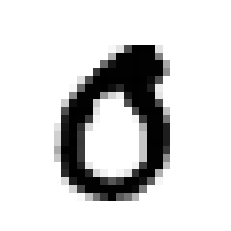

In [5]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

some_digit = X[200]
plot_digit(some_digit)

### 1. train model using KNeighborsClassifier

* model pipeline

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

prep_pipeline = Pipeline([
                ('std_scaler', StandardScaler())
])
# prep_pipeline.set_params(std_scaler='passthrough')

# X_train_prep = prep_pipeline.fit_transform(X_train)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

full_pipeline = Pipeline([
                        ('prep', prep_pipeline),
                        ('knn', knn_clf)
])

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'prep__std_scaler':['passthrough'], 'knn__weights':['uniform'], 'knn__n_neighbors':[3]}

grid_search = GridSearchCV(full_pipeline, param_grid, cv = 3, n_jobs = 4, scoring = 'accuracy', verbose = 2, return_train_score = True)

In [9]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed: 49.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        Pipeline(memory=None,
                                                 steps=[('std_scaler',
                                                         StandardScaler(copy=True,
                                                                        with_mean=True,
                                                                        with_std=True))],
                                                 verbose=False)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                

In [21]:
y_pred = grid_search.predict(X_test)

In [ ]:
from sklearn.externals import joblib

my_model = grid_search
joblib.dump(my_model, "chap3_ex.pkl")

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('precision : {}'.format(prec))
print('recall : {}'.format(recall))
print('f1 : {}'.format(f1))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].